In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
result = pd.read_csv('plpop_results_5_22.csv')
result = result[result.stellar_radius<4]
result.drop(result[(result.Teff<5500)&(result.Teff>4500)&(result.Kepler_mag>16)].index,inplace=True)
result.reset_index(inplace=True,drop=True)
'''
result = result[result.Teff<6300]
result = result[result.plpop_teff_1>3000]
result = result[result['plpop_K-kep_med_normalized']<200]
result.reset_index(inplace=True,drop=True)
'''
plt.rc('font',family='Arial')
scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

In [ ]:
result.plpop_H_Earth_med

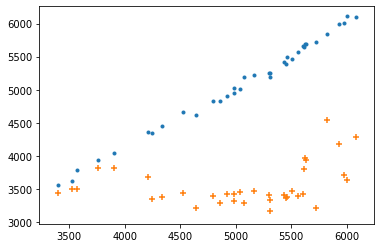

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
band = ['g','r','i','z','J','H','K']
band_official = ['$g$','$r$','$i$','$z$','$J$','$H$','$Ks$']


diff_hot = [hot['beb_{}_med'.format(b)].mean() for b in band] 
diff_cold = [cold['beb_{}_med'.format(b)].mean() for b in band] 

diff_hot_err = [hot['beb_{}_qua'.format(b)].mean() for b in band] 
diff_cold_err = [cold['beb_{}_qua'.format(b)].mean() for b in band] 


ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])
rects1 = ax.bar(ind, diff_hot, width, color='b',yerr = diff_hot_err,capsize = 5)

rects2 = ax.bar(ind + width, diff_cold, width, color='c',yerr = diff_cold_err,capsize = 5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Depth-difference / ppm',fontsize=12)
ax.set_xlabel('Reference Bands',fontsize=12)
ax.set_title('Multi-Color Simulation for Background Eclipsing Binaries',fontsize=15)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(band_official,fontsize=15)
ax.legend((rects1[0], rects2[0]), ('$T_{eff, foreground}$ > 4000 K', '$T_{eff, foreground}$ < 4000 K'),fontsize=12,loc='upper left')
ax.set_yscale('log')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=12)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
#fig.savefig('BEB_band_diff.pdf',dpi=300,bbox_tight=True)



In [474]:
giant = result[result.plpop_radius_0>1]
giant

,DEC,H_mag,J_mag,K_mag,Kepler_mag,RA,Teff,Teff_err,age,age_err,...,plpop_z_mag_0,plpop_z_mag_1,r_mag,spec_type,stellar_mass,stellar_mass_err,stellar_radius,stellar_radius_err,transit_depth,z_mag
2,42.166779,11.251,11.558,11.209,12.596,287.604612,5979.0,108.0,3.72,-1.840,...,12.468417,16.769509,12.557,NaN,0.913,0.058,1.005,0.138,609.2,12.397
3,38.142973,10.830,11.159,10.793,12.261,290.526750,5821.0,78.0,3.39,-1.680,...,12.313885,14.999716,12.189,NaN,1.092,0.114,1.547,0.270,169.5,11.968
4,46.062325,11.065,11.430,10.983,12.654,294.559169,5626.0,89.0,3.89,-0.400,...,12.392042,17.087418,12.528,NaN,1.247,0.082,2.057,0.125,1646.2,12.313
7,41.343037,10.516,10.797,10.424,11.818,283.235810,5931.0,107.0,4.37,-2.250,...,11.816680,15.250565,11.749,NaN,0.929,0.066,1.101,0.157,177.7,11.632
12,50.559006,10.577,10.814,10.535,11.811,295.226435,6003.0,96.0,5.37,-0.940,...,11.708980,16.597063,11.775,NaN,0.902,0.043,1.109,0.036,119.0,11.677
19,38.228866,10.021,10.357,9.968,11.457,287.478529,5720.0,77.0,4.27,-1.240,...,11.261264,16.498098,11.390,NaN,1.067,0.039,1.080,0.027,298.9,11.230
21,50.242409,10.906,11.202,10.875,12.182,286.247188,6085.0,108.0,2.69,-0.901,...,12.197616,15.643307,12.127,NaN,1.290,0.088,1.463,0.260,134.1,12.031


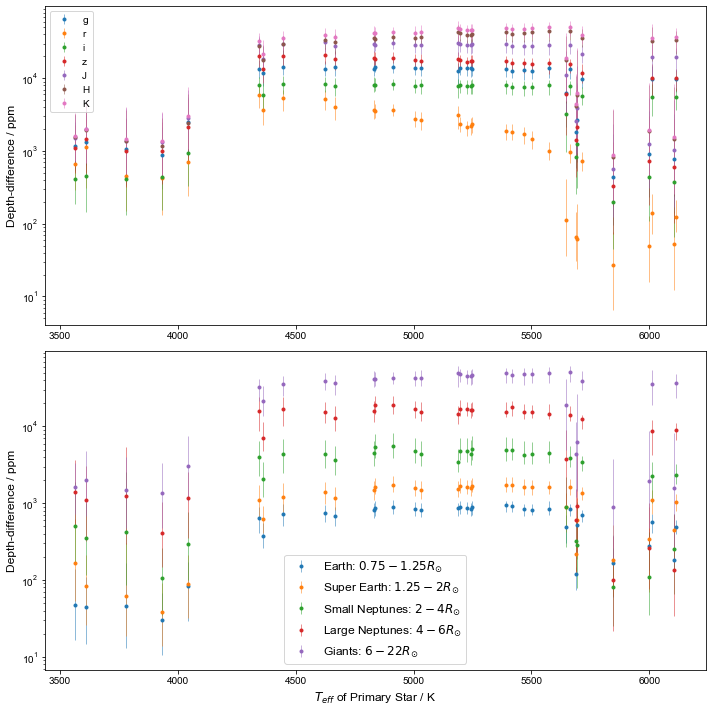

In [23]:
plt.figure(figsize=[10,10])
plt.subplot(211)
band = ['g','r','i','z','J','H','K']
pl_df = result
for b in band:
    bp = 'plpop_'+b+'_Giants'
    qua = pl_df[bp+'_qua'].values
    med = pl_df[bp+'_med'].values
    tqua = pl_df[bp+'_tqua'].values
    y_err = np.array((med-qua,tqua-med))
    plt.errorbar(x=pl_df.plpop_teff_0,y=med,yerr=y_err,fmt='.',label=b,**error_kwargs)    
plt.legend(loc='best')
plt.yscale('log')
plt.ylabel('Depth-difference / ppm',fontsize=12)

plt.subplot(212)

planet = ['Earth','Super_Earth','Small_Neptunes','Large_Neptunes','Giants']
pl = ['Earth: $0.75-1.25R_{\odot}$','Super Earth: $1.25-2R_{\odot}$','Small Neptunes: $2-4R_{\odot}$',
      'Large Neptunes: $4-6R_{\odot}$','Giants: $6-22R_{\odot}$']
error_kwargs = {"lw":.5, "zorder":0}
for ind,p in enumerate(planet):
    bp = 'plpop_K_' + p
    qua = result[bp+'_qua'].values
    med = result[bp+'_med'].values
    tqua = result[bp+'_tqua'].values
    y_err = np.array((med-qua,tqua-med))
    plt.errorbar(x=result.plpop_teff_0,y=med,yerr=y_err,fmt='.',label=pl[ind],**error_kwargs)    
plt.legend(fontsize=12)
plt.yscale('log')
plt.ylabel('Depth-difference / ppm',fontsize=12)
plt.xlabel('$T_{eff}$ of Primary Star / K',fontsize=12)
plt.tight_layout()

plt.savefig('plpop_teff_vs_depth.pdf',dpi=300,bbox_tight=True)


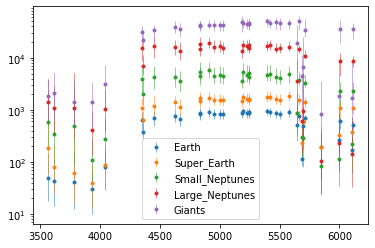

In [166]:
planet = ['Earth','Super_Earth','Small_Neptunes','Large_Neptunes','Giants']
error_kwargs = {"lw":.5, "zorder":0}
for p in planet:
    bp = 'plpop_K_' + p
    qua = result[bp+'_qua'].values
    med = result[bp+'_med'].values
    tqua = result[bp+'_tqua'].values
    y_err = np.array((med-qua,tqua-med))
    plt.errorbar(x=result.plpop_teff_0,y=med,yerr=y_err,fmt='.',label=p,**error_kwargs)    
plt.legend()
#plt.title('Companion Transiting Planet: Giants multicolor difference',fontsize=15)
plt.yscale('log')

Text(0.01, 0.5, 'Normalized Depth-difference / ppm per $(R_{\\oplus})^2$')

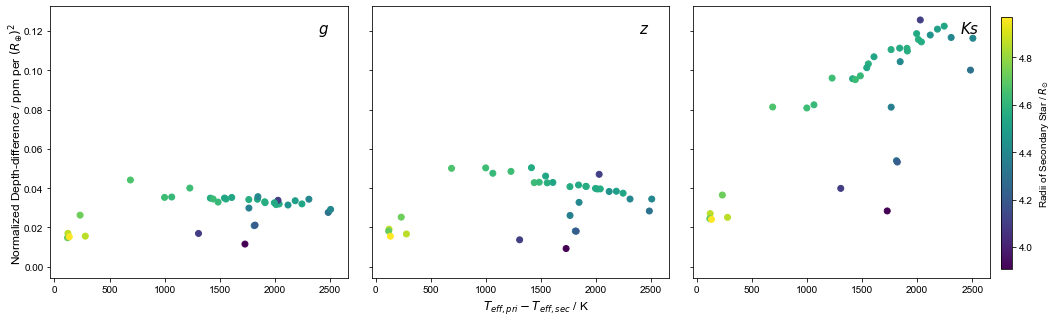

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5),sharex=True, sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

x = result.plpop_teff_0-result.plpop_teff_1

for ind,ax in enumerate(axes.flat):
    b = band[ind]
    qua = result['plpop_'+b+'-kep_qua_normalized'].values
    med = result['plpop_'+b+'-kep_med_normalized'].values
    tqua = result['plpop_'+b+'-kep_tqua_normalized'].values
    y = abs(df_dilution[b])
    y_err = np.array((med-qua,tqua-med))
    #ax.errorbar(x=x,y=med,yerr=y_err,fmt='none',**error_kwargs)
    
    im = ax.scatter(x,y,c=result.logg,marker='o',**scatter_kwargs)
    #ax.set_yscale('log')

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
plt.margins(0, 0)
fig.colorbar(im, cax=cbar_ax,label='Radii of Secondary Star / $R_{\odot}$')
fig.text(0.5, 0.04, '$T_{eff,pri}-T_{eff,sec}$ / K', ha='center',fontsize=12)
fig.text(0.01, 0.5, 'Normalized Depth-difference / ppm per $(R_{\oplus})^2$', va='center', rotation='vertical',fontsize=12)
plt.savefig('plpop_teff.pdf',dpi=300,pad_inches=0)

In [276]:
import matplotlib.pyplot as plt
plt.rc('font',family='Arial')

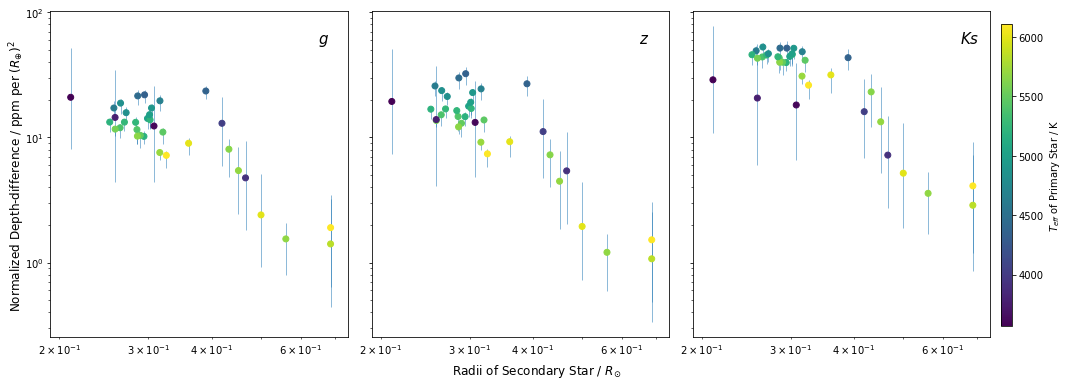

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6),sharex=True, sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

x = result.plpop_radius_1

for ind,ax in enumerate(axes.flat):
    b = band[ind]
    qua = result['plpop_'+b+'-kep_qua_normalized'].values
    med = result['plpop_'+b+'-kep_med_normalized'].values
    tqua = result['plpop_'+b+'-kep_tqua_normalized'].values
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='none',**error_kwargs)
    im = ax.scatter(x,med,c=result.plpop_teff_0,marker='o',**scatter_kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ of Primary Star / K')
fig.text(0.5, 0.04, 'Radii of Secondary Star / $R_{\odot}$', ha='center',fontsize=12)
fig.text(0.01, 0.5, 'Normalized Depth-difference / ppm per $(R_{\oplus})^2$', va='center', rotation='vertical',fontsize=12)
plt.savefig('plpop_radius.pdf',dpi=300,bbox_tight=True)

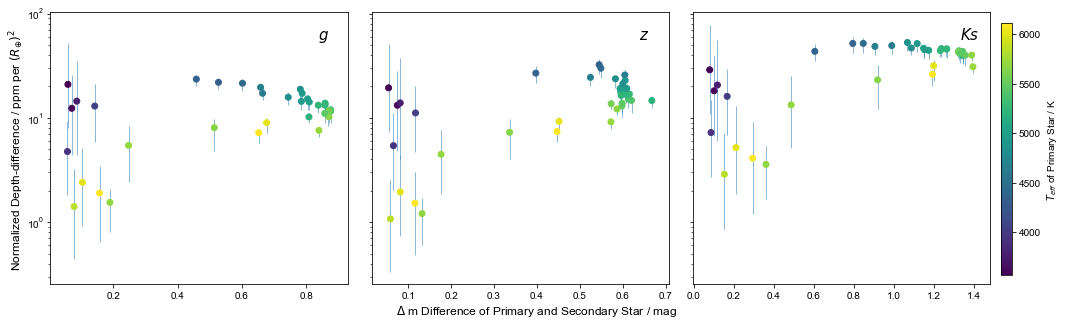

In [423]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

color = result.plpop_teff_0

for ind,ax in enumerate(axes.flat):
    b = band[ind]
    x = result['plpop_{}_dmag_med'.format(b)]
    qua = result['plpop_'+b+'-kep_qua_normalized'].values
    med = result['plpop_'+b+'-kep_med_normalized'].values
    tqua = result['plpop_'+b+'-kep_tqua_normalized'].values
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='none',**error_kwargs)
    im = ax.scatter(x,med,c=color,marker='o',**scatter_kwargs)
    ax.set_yscale('log')
    

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ of Primary Star / K')
fig.text(0.5, 0.04, '$\Delta$ m Difference of Primary and Secondary Star / mag', ha='center',fontsize=12)
fig.text(0.01, 0.5, 'Normalized Depth-difference / ppm per $(R_{\oplus})^2$', va='center', rotation='vertical',fontsize=12)
plt.savefig('plpop_dmag.pdf',dpi=300,bbox_tight=True)

In [475]:
band='K'
dmag = result['plpop_'+band+'_dmag_med']
c = 1/(1+10**(-0.4*dmag))

In [479]:
giant = result[(result.plpop_teff_0>5500)&(c<0.74)]
giant.logg

3     4.097
4     3.907
7     4.322
21    4.218
22    4.359
32    4.401
Name: logg, dtype: float64

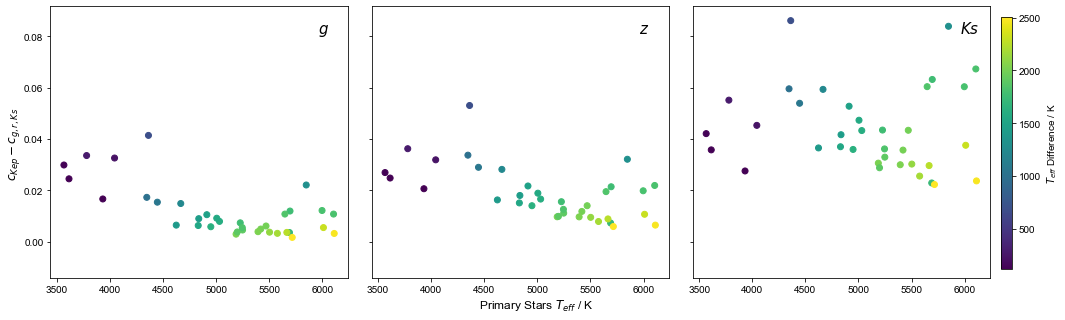

In [417]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

color = result.plpop_teff_0-result.plpop_teff_1

for ind,ax in enumerate(axes.flat):
    
    b = band[ind]
    x = result.plpop_teff_0
    #y = fluxfrac(result['plpop_{}_mag_1'.format(b)],result['plpop_{}_mag_0'.format(b)])
    #y = result['plpop_'+b+'-kep_med_normalized'].values
    y = abs(dilution_factor_kep-fluxfrac(result['plpop_{}_mag_1'.format(b)],result['plpop_{}_mag_0'.format(b)]))
    '''
    qua = result['plpop_'+b+'-kep_qua_normalized'].values
    med = result['plpop_'+b+'-kep_med_normalized'].values
    tqua = result['plpop_'+b+'-kep_tqua_normalized'].values
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='none',**error_kwargs)
    '''
    im = ax.scatter(x,y,c=color,marker='o',**scatter_kwargs)
    #ax.set_xscale('log')
    

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ Difference / K')
fig.text(0.5, 0.04, 'Primary Stars $T_{eff}$ / K', ha='center',fontsize=12)
fig.text(0.01, 0.5, '$c_{Kep}-c_{g,r,Ks}$', va='center', rotation='vertical',fontsize=12)
fig.savefig('plpop_teff_vs_contamination.pdf',dpi=300,bbox_tight=True)



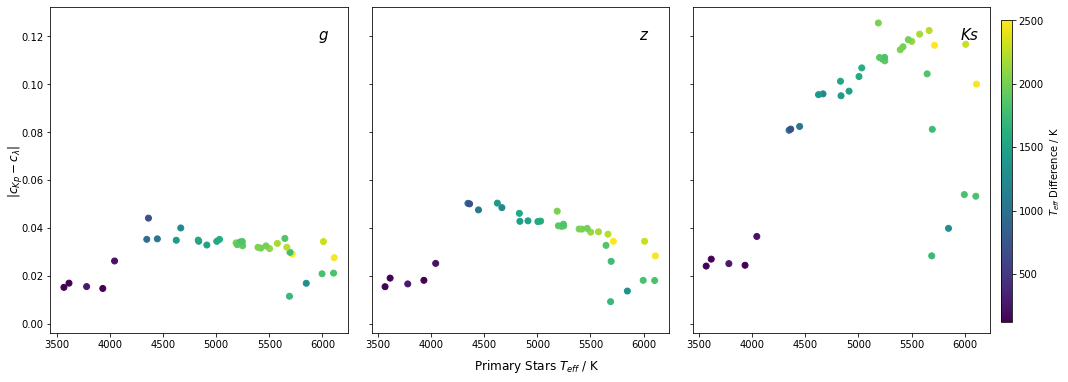

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

color = result.plpop_teff_0-result.plpop_teff_1

for ind,ax in enumerate(axes.flat):
    
    b = band[ind]
    x = result.plpop_teff_0
    #y = fluxfrac(result['plpop_{}_mag_1'.format(b)],result['plpop_{}_mag_0'.format(b)])
    #y = result['plpop_'+b+'-kep_med_normalized'].values
    y = abs(df_dilution[b])
    '''
    qua = result['plpop_'+b+'-kep_qua_normalized'].values
    med = result['plpop_'+b+'-kep_med_normalized'].values
    tqua = result['plpop_'+b+'-kep_tqua_normalized'].values
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='none',**error_kwargs)
    '''
    im = ax.scatter(x,y,c=color,marker='o',**scatter_kwargs)
    #ax.set_xscale('log')
    

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ Difference / K')
fig.text(0.5, 0.04, 'Primary Stars $T_{eff}$ / K', ha='center',fontsize=12)
fig.text(0.01, 0.5, '|$c_{Kp}-c_{\lambda}$|', va='center', rotation='vertical',fontsize=12)
fig.savefig('plpop_teff_vs_contamination.pdf',dpi=300,bbox_tight=True)



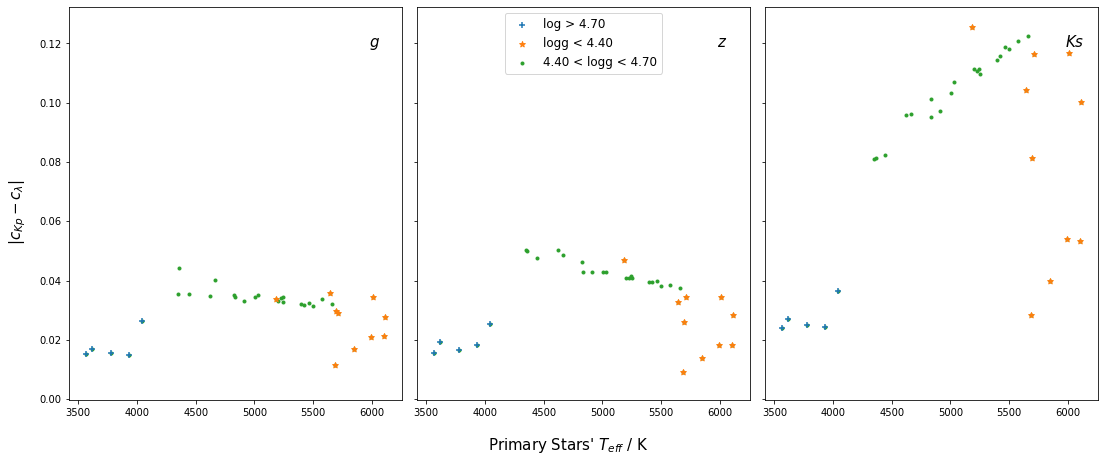

In [19]:
cool_dwarf = result[result.Teff<4000]
#normal_star = result[result.Teff<]
giant = result[result.logg<4.402]
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

#color = result.plpop_radius_1
color=None
for ind,ax in enumerate(axes.flat):
    
    b = band[ind]
    #y = fluxfrac(result['plpop_{}_mag_1'.format(b)],result['plpop_{}_mag_0'.format(b)])
    #y = result['plpop_'+b+'-kep_med_normalized'].values
    y = abs(df_dilution[b])

    ax.scatter(cool_dwarf.plpop_teff_0,abs(df_dilution.iloc[cool_dwarf.index][b]),c=color,marker='+',label='log > 4.70',**scatter_kwargs)
    ax.scatter(giant.plpop_teff_0,abs(df_dilution.iloc[giant.index][b]),c=color,marker='*',label='logg < 4.40',**scatter_kwargs)
    im =ax.scatter(result.plpop_teff_0,abs(df_dilution[b]),marker='.',label='4.40 < logg < 4.70',c = color)
    

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
#cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
axes.flat[1].legend(loc='upper center',fontsize=12)
#fig.colorbar(im, cax=cbar_ax,label='Radii of Secondary Star / $R_{\odot}$')
fig.text(0.5, -0.05, 'Primary Stars\' $T_{eff}$ / K', ha='center',fontsize=15)
fig.text(-0.02, 0.5, '|$c_{Kp}-c_{\lambda}$|', va='center', rotation='vertical',fontsize=15)
plt.tight_layout()
fig.savefig('plpop_teff_vs_contamination_logg.pdf',dpi=300)



In [7]:
folder='/Users/neptune/Documents/Thesis/pipeline/data_4_28/'
band = ['g','z','K']
from vespa.stars.utils import fluxfrac
df_dilution = pd.DataFrame(np.zeros([len(result),len(band)]),columns=band)
hostname = result.host_name

for ind, name in enumerate(hostname):
    k,i = hostname.iloc[ind].split('-')
    label = k+i
    df = pd.read_csv(folder+label+'/plpop_sample.csv')
    cg = fluxfrac(df.g_mag_1,df.g_mag_0)
    cz = fluxfrac(df.z_mag_1,df.z_mag_0)
    cK = fluxfrac(df.K_mag_1,df.K_mag_0)
    ckep = fluxfrac(df.Kepler_mag_1,df.Kepler_mag_0)
    
    df_dilution.iloc[ind]['g']=(cg-ckep).mean()
    df_dilution.iloc[ind]['z']=(cz-ckep).mean()
    df_dilution.iloc[ind]['K']=(cK-ckep).mean()

/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


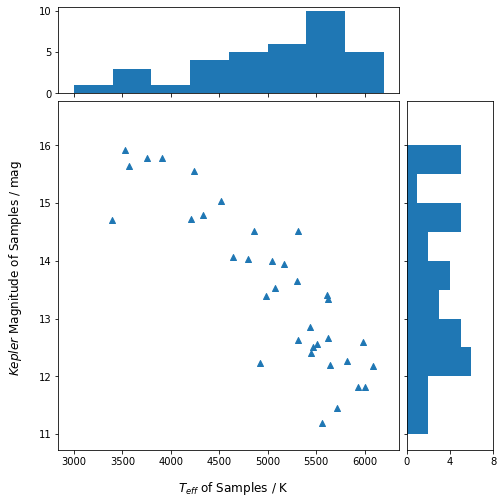

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# the random data
y = result.Kepler_mag
x = result.Teff


fig, axScatter = plt.subplots(figsize=(7, 7))

# the scatter plot:
axScatter.scatter(x, y,marker='^')
#axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
#xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
#lim = (int(xymax/binwidth) + 1)*binwidth
ybins = np.arange(11,17,0.5)
xbins = np.arange(3000,6500,400)
#bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=xbins)
axHisty.hist(y, bins=ybins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 5, 10])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 4, 8])

axScatter.text(0.35, -0.12, '$T_{eff}$ of Samples / K', transform=axScatter.transAxes, 
            size=12)

axScatter.text(-0.15, 0.52, '$Kepler$ Magnitude of Samples / mag', transform=axScatter.transAxes, va='center', rotation='vertical',
            size=12)

plt.tight_layout()
plt.draw()
plt.show()

fig.savefig('plpop_sample_teffkep.pdf',dpi=300,bbox_tight=True)

/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


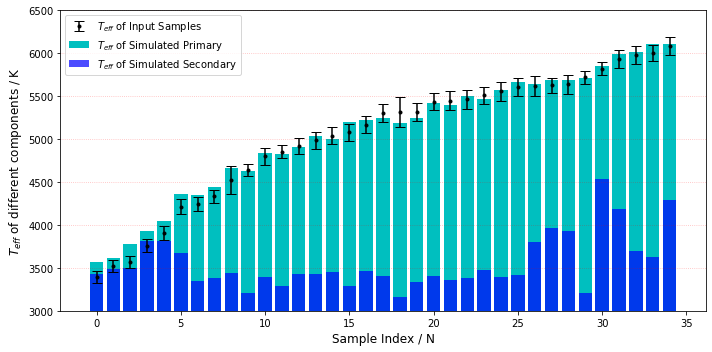

In [25]:
plt.figure(figsize=(10,5))
tmp = result[['Teff','Teff_err','plpop_teff_0','plpop_teff_1']]
tmp.sort_values(['Teff'],inplace=True)

plt.errorbar(np.arange(len(tmp)),tmp.Teff,yerr = tmp.Teff_err,fmt='.',capsize=5,c='black',label='$T_{eff}$ of Input Samples'
            ,zorder=100)
plt.bar(np.arange(len(tmp)),tmp.plpop_teff_0,alpha=1,color='c',label='$T_{eff}$ of Simulated Primary')
plt.bar(np.arange(len(tmp)),tmp.plpop_teff_1,alpha=0.7,color='b',label='$T_{eff}$ of Simulated Secondary')
plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)
plt.xlabel('Sample Index / N',fontsize=12)
plt.ylabel('$T_{eff}$ of different components / K',fontsize=12)
plt.ylim([3000,6500])
plt.legend()
plt.tight_layout()
plt.savefig('plpop_simulation_teff.pdf',dpi=300,bbox_tight=True)

In [26]:
from astropy import constants as const
Rear = const.R_earth
Rsun = const.R_sun

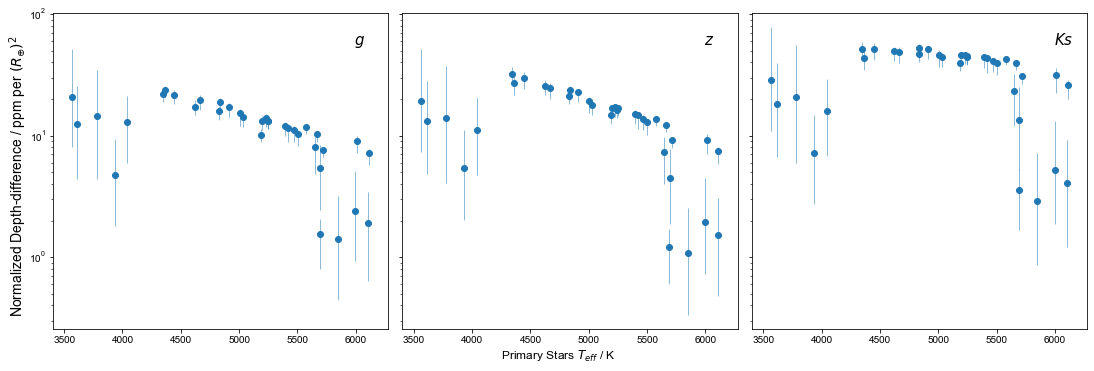

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

color = result.plpop_teff_0-result.plpop_teff_1

for ind,ax in enumerate(axes.flat):
    
    b = band[ind]
    x = result.plpop_teff_0
    #y = 1e6*abs(df_dilution[b])*(result.plpop_radius_1*Rsun/Rear)**(-2)

    qua = result['plpop_'+b+'-kep_qua_normalized'].values
    med = result['plpop_'+b+'-kep_med_normalized'].values
    tqua = result['plpop_'+b+'-kep_tqua_normalized'].values
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='none',**error_kwargs)
    ax.scatter(x,med,**scatter_kwargs)

    #im = ax.scatter(x,y,c=color,marker='o',**scatter_kwargs)
    ax.set_yscale('log')
    

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
#fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
#cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
#fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ Difference / K')
fig.text(0.5, -0.01, 'Primary Stars $T_{eff}$ / K', ha='center',fontsize=12)
fig.text(-0.01, 0.5, 'Normalized Depth-difference / ppm per $(R_{\oplus})^2$', va='center', rotation='vertical',fontsize=14)
fig.tight_layout()
fig.savefig('norm_teff.pdf',dpi=300)

Text(0.01, 0.5, '|$c_{Kp}-c_{\\lambda}$|')

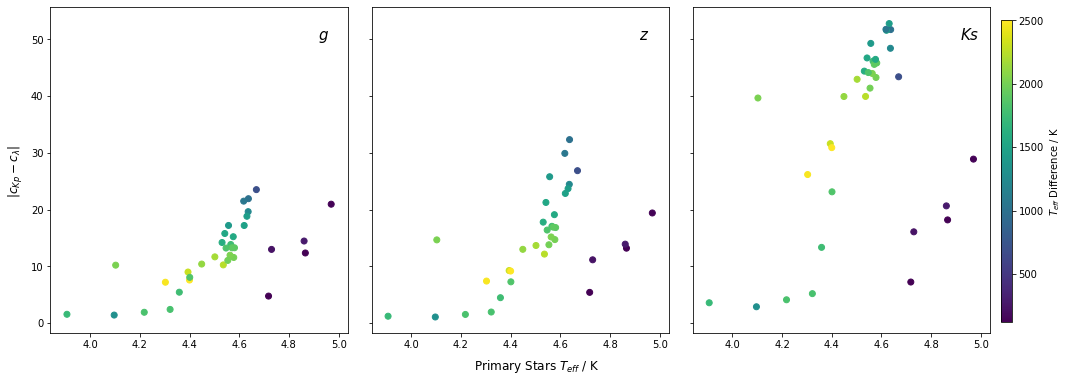

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

color = result.plpop_teff_0-result.plpop_teff_1

for ind,ax in enumerate(axes.flat):
    
    b = band[ind]
    x = result.logg
    #y = fluxfrac(result['plpop_{}_mag_1'.format(b)],result['plpop_{}_mag_0'.format(b)])
    y = result['plpop_'+b+'-kep_med_normalized'].values
    #y = abs(df_dilution[b])
    '''
    qua = result['plpop_'+b+'-kep_qua_normalized'].values
    med = result['plpop_'+b+'-kep_med_normalized'].values
    tqua = result['plpop_'+b+'-kep_tqua_normalized'].values
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='none',**error_kwargs)
    '''
    im = ax.scatter(x,y,c=color,marker='o',**scatter_kwargs)
    #ax.set_xscale('log')
    

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ Difference / K')
fig.text(0.5, 0.04, 'Primary Stars $T_{eff}$ / K', ha='center',fontsize=12)
fig.text(0.01, 0.5, '|$c_{Kp}-c_{\lambda}$|', va='center', rotation='vertical',fontsize=12)

In [4]:
folder='/Users/neptune/Documents/Thesis/pipeline/data_4_28/'
logg = pd.DataFrame(np.zeros([len(result),1]),columns=['logg'])
hostname = result.host_name

for ind, name in enumerate(hostname):
    k,i = hostname.iloc[ind].split('-')
    label = k+i
    df = pd.read_csv(folder+label+'/plpop_sample.csv')
    logg.iloc[ind]['logg']=df.logg_1.mean()

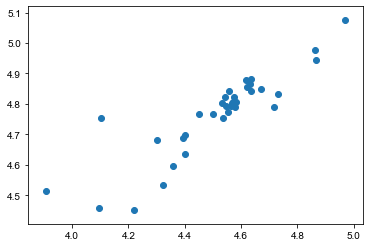

In [6]:
plt.scatter(result.logg,logg.logg)

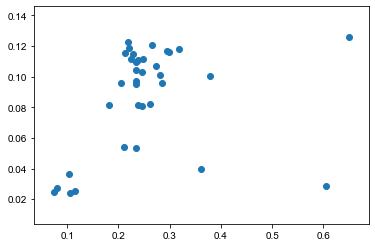

In [17]:
plt.scatter(logg.logg-result.logg,df_dilution['K'])